# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# Read News CSV Dataset

In [90]:
fake_df = pd.read_csv("Fake.csv", low_memory=False)[['title','text','subject','date']]
true_df = pd.read_csv("True.csv", low_memory=False)

In [91]:
fake_df.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [92]:
true_df.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Data Pre-Processing

In [93]:
# inserting class column as a feature/label
fake_df['class'] = 0
true_df['class'] = 1

In [94]:
true_df.shape, fake_df.shape

((9999, 5), (9999, 5))

In [95]:
# Removing last 10 rows for manual testing

fake_df_manual_testing = fake_df.tail(10)

for i in range(9989, 9999):
    fake_df.drop([i], axis=0, inplace=True)

In [96]:
true_df_manual_testing = true_df.tail(10)

for i in range(9989, 9999):
    true_df.drop([i], axis=0, inplace=True)

In [97]:
true_df.shape, fake_df.shape

((9989, 5), (9989, 5))

In [98]:
df_manual_testing = pd.concat([fake_df_manual_testing, true_df_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [99]:
merged_df = pd.concat([fake_df, true_df], axis=0)
merged_df.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [100]:
merged_df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [101]:
# remove unnecessary columns
df = merged_df.drop(columns=['title', 'subject', 'date'], axis=1)

In [102]:
df.isnull().sum()

text     1
class    0
dtype: int64

In [103]:
df.dropna(inplace=True)

In [104]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [105]:
# Random Shuffling the dataframe
df = df.sample(frac=1)

In [107]:
df.head()

,text,class
549,Donald Trump s weak response to the racially m...,0
4870,President Obama used this week s Weekly Addre...,0
2095,WASHINGTON (Reuters) - U.S. President Donald T...,1
3140,"Well, it s happening. If you voted your consc...",0
5265,WASHINGTON (Reuters) - U.S. President Donald T...,1


In [109]:
df.columns

Index(['text', 'class'], dtype='object')

# Function to Process the NEWS text

In [110]:
def processText(text):
    # Convert the text to lowercase
    text = text.lower()
    # Remove text between square brackets, like [text]
    text = re.sub('\[.*?\]', '', text)
    # Replace non-word characters (punctuation, symbols) with spaces
    text = re.sub("\\W", " ", text)
    # Remove URLs starting with 'http://' or 'https://' and 'www.'
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # Remove all punctuation characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove newline characters
    text = re.sub('\n', '', text)
    # Remove words containing digits (e.g., 'word123')
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [111]:
df['text'] = df['text'].apply(processText)

# Train and Test Data Splitting

In [113]:
# Independent/Features and dependent/Labels

X = df['text']
y = df['class']

In [115]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [120]:
# text to vector/numeric forms
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

# Logistic Regression

In [126]:
# logisticRegression
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(xv_train, y_train)

LogisticRegression()

In [127]:
predictions = LR_model.predict(xv_test)

In [128]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [131]:
LR_model.score(xv_test, y_test)

0.9873873873873874

In [133]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2483
           1       0.98      0.99      0.99      2512

    accuracy                           0.99      4995
   macro avg       0.99      0.99      0.99      4995
weighted avg       0.99      0.99      0.99      4995



# Decision Tree Classification

In [134]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()
DT_model.fit(xv_train, y_train)

DecisionTreeClassifier()

In [135]:
predictions = DT_model.predict(xv_test)

In [136]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [137]:
DT_model.score(xv_test, y_test)

0.9975975975975976

In [138]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2483
           1       1.00      1.00      1.00      2512

    accuracy                           1.00      4995
   macro avg       1.00      1.00      1.00      4995
weighted avg       1.00      1.00      1.00      4995



# Random Forest Classifier

In [139]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(xv_train, y_train)

RandomForestClassifier()

In [140]:
predictions = RF_model.predict(xv_test)

In [141]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [142]:
RF_model.score(xv_test, y_test)

0.9895895895895895

In [163]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2483
           1       0.99      0.99      0.99      2512

    accuracy                           0.99      4995
   macro avg       0.99      0.99      0.99      4995
weighted avg       0.99      0.99      0.99      4995



# Visualize Confusion Matrix

In [177]:
# visualization/ confusion matrix
from sklearn.metrics import confusion_matrix, roc_curve

def visualizeMatrix(y_test, prediction, title):
    cm = confusion_matrix(y_test, prediction)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

# Linear Regression Confusion Matrix

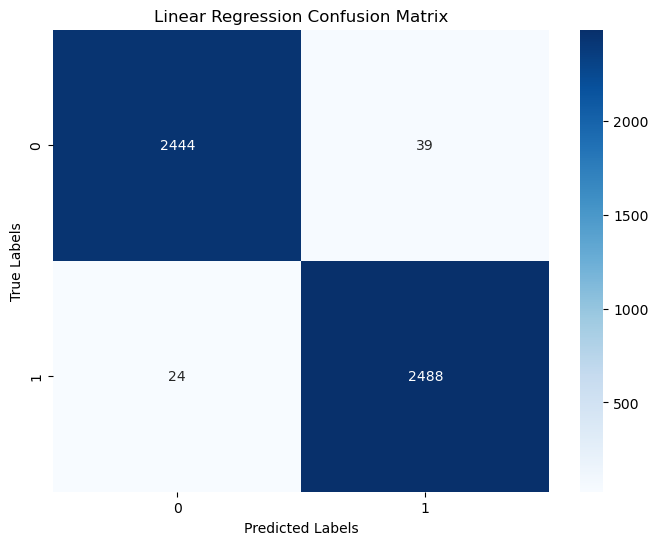

In [173]:
visualizeMatrix(y_test, LR_model.predict(xv_test), "Linear Regression Confusion Matrix")

# Decision Tree Confusion Matrix

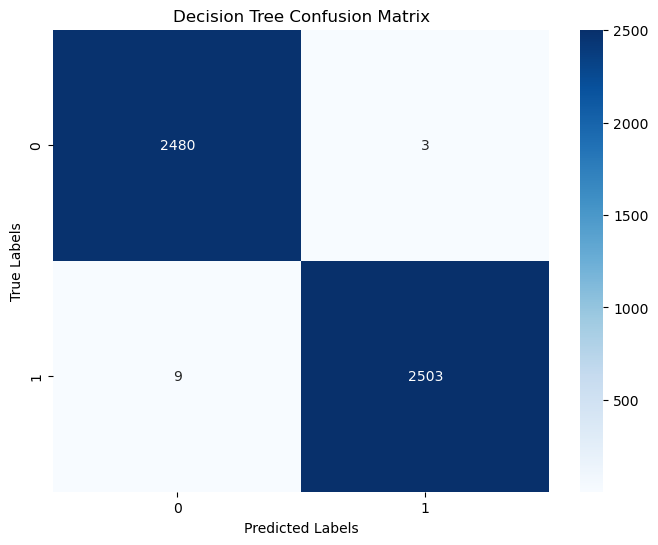

In [174]:
visualizeMatrix(y_test, DT_model.predict(xv_test), "Decision Tree Confusion Matrix")

# Random Forest Confusion Matrix

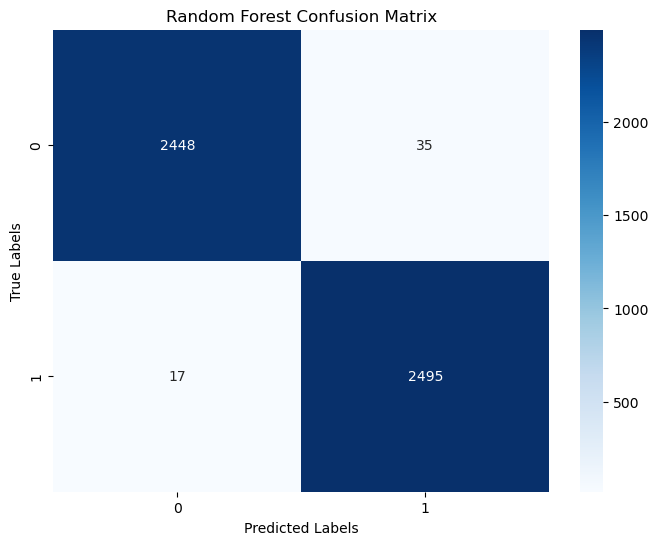

In [175]:
visualizeMatrix(y_test, RF_model.predict(xv_test), "Random Forest Confusion Matrix")

# Testing Models

In [150]:
# Testing Model
def output_label(prediction):
    if prediction[0] == 0:
        return "News is Fake"
    else:
        return "News is Real"

def modeltesting(news):
    news = {"text": [news]}
    news_df = pd.DataFrame(news)
    news_df['text'] = news_df['text'].apply(processText)
    
    x_test = news_df['text']
    xv_test = vectorization.transform(x_test)
    
    LR_prediction = LR_model.predict(xv_test)
    DT_prediction = DT_model.predict(xv_test)
    RF_prediction = RF_model.predict(xv_test)
    
    print(output_label(LR_prediction))
    print(output_label(DT_prediction))
    print(output_label(RF_prediction))

In [161]:
for i in range(5):
    news = str(input("Enter Some News: "))
    print("\n")
    modeltesting(news)
    print("\n")

Enter Some News: Donald Trump Sends Out Embarrassing New Yearâ€™s Eve Message; This is Disturbing


News is Fake
News is Fake
News is Real


Enter Some News: As teams gathered in South Africa for the summer's World Cup, soccer fans from the world over eagerly seized upon an African horn that made jubilant footie fans sound more like an angry beehive. The controversial horn, which caused many TV viewers to hit the "mute" button, emits 127 decibels, louder than sandblasting or a pneumatic riveter. FIFA president Sepp Blatter jumped into the din and said the vuvuzela would not be banned from venues, but some countries took preventive measures


News is Real
News is Fake
News is Real


Enter Some News: On Jan. 12, 2010, a devastating earthquake struck near the capital of Haiti, Port-au-Prince, with a shocking magnitude of 7.0, killing thousands and leaving an already impoverished nation in shambles. The Haitian government's death toll estimate of 230,000 puts the temblor at the sixth deadl